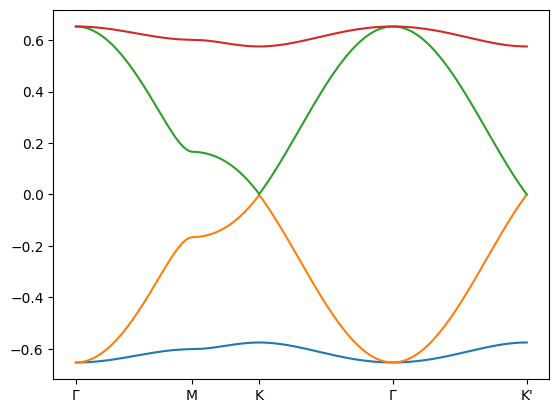

In [5]:
#The band structure of Graphene
from numpy import *
import numpy.matlib as mtl
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

### lattice and orbit
# s py pz px dxy dyz dz2 dxz d(x2-y2)
# 0 1  2  3  4   5   6   7   8   
lat = [[1,0],[-1/2, sqrt(3)/2]]
lat=array(lat)
c1 = [2/3,1/3, 2]
c2 = [1/3,2/3, 2]
# o3 = [1/3,2/3, 5]
# o4 = [1/3,2/3, 7]

## bond energy
dd_sigma = 0
dd_pi = 0.4096
dd_delta = 0.0259
num = 2   ##orbit number
t_pz = 1 # the hopping term between pz orbitals in different A/B sites

## connect vector and direction cosin
def vector(c1,c2,x,y):
    r = (c2[0:2]+array([x,y])-c1[0:2]).dot(lat)
    l = r[0]/sqrt(r[0]**2+r[1]**2)
    m = r[1]/sqrt(r[0]**2+r[1]**2)
    return r,l, m

## SK parameters
# s py pz px dxy dyz dz2 dxz  d(x2-y2)
# 0 1  2  3  4   5   6   7     8

def sk(l,m,d1,d2,dd_sigma,dd_pi,dd_delta):   
    sk = zeros((9,9)) 
    sk[2,2] = 
    sk[4,4] =  3*l**2 *m**2 * dd_sigma + (l**2 + m**2 - 4 * l**2 * m**2) * dd_pi + l**2 * m**2 * dd_delta
    sk[4,5] =  0
    sk[4,6] =  -0.5*sqrt(3)*l*m*(l**2+m**2)*dd_sigma + 0.5*l*m*dd_delta 
    sk[4,7] =  0
    sk[4,8] =  3/2 * l * m *(l**2-m**2) * dd_sigma + 2*l*m*(m**2-l**2) * dd_pi + 0.5*l*m*(l**2-m**2)*dd_delta
    
    sk[5,4] =  0
    sk[5,5] =  m**2*dd_pi+ l**2*dd_delta
    sk[5,6] = 0
    sk[5,7] = l*m*dd_pi -l*m*dd_delta
    sk[5,8] = 0
    
    sk[6,4] = sk[4,6]
    sk[6,5] = 0
    sk[6,6] = 1/4 * (l**2+m**2)**2 * dd_sigma +  3/4 * (l**2+m**2)**2 * dd_delta  
    sk[6,7] = 0
    sk[6,8] = sqrt(3)/4 * (l**2-m**2) * dd_delta - sqrt(3)/4 * (l**2-m**2) * (l**2+m**2) * dd_sigma
    
    sk[7,4] =  0
    sk[7,5] =  sk[5,7]
    sk[7,6] =  0
    sk[7,7] = l**2 * dd_pi + m**2 * dd_delta 
    sk[7,8] = 0
    
    sk[8,4] = sk[4,8]
    sk[8,5] = 0
    sk[8,6] = sk[6,8]
    sk[8,7] = sk[7,8] 
    sk[8,8] = 3/4 * (l**2-m**2) * dd_sigma + (l**2 + m**2 - (l**2-m**2)**2) * dd_pi + \
    1/4 * (l**2-m**2)**2 * dd_delta
    #print("sk is:", sk.shape)
    return sk[d1,d2]

### give connect vector and hopping from SK results
def hop_vec(c1,c2,x,y):
    r,l,m =vector(c1,c2,x,y)
    d1,d2 =  c1[2],c2[2]
    t=sk(l,m,d1,d2,dd_sigma,dd_pi,dd_delta)
    return t,r


## give hopping t and connect vector for the matrix element
t131,r131 =  hop_vec(c1,c2,0,0)
t141,r141 =  hop_vec(c1,c2,0,1)
t132,r132 =  hop_vec(c1,c2,1,0)
# t142,r142 =  hop_vec(o1,o4,1,0)
# t133,r133 =  hop_vec(o1,o3,0,-1)
# t143,r143 =  hop_vec(o1,o4,0,-1)

# t231,r231 =  hop_vec(o2,o3,0,0)
# t241,r241 =  hop_vec(o2,o4,0,0)
# t232,r232 =  hop_vec(o2,o3,1,0)
# t242,r242 =  hop_vec(o2,o4,1,0)
# t233,r233 =  hop_vec(o2,o3,0,-1)
# t243,r243 =  hop_vec(o2,o4,0,-1)

## eigenvalue of Hamiltonian

def H(K):
    H=zeros((num,num),dtype=complex)
    H[0,1] = t131 * exp(1.j*K.dot(r131)) +  t132 * exp(1.j*K.dot(r132)) +  t141 * exp(1.j*K.dot(r141)) 
#     H[0,3] = t141 * exp(1.j*K.dot(r141)) +  t142 * exp(1.j*K.dot(r142)) +  t143 * exp(1.j*K.dot(r143)) 
#     H[1,2] = t231 * exp(1.j*K.dot(r231)) +  t232 * exp(1.j*K.dot(r232)) +  t233 * exp(1.j*K.dot(r233)) 
#     H[1,3] = t241 * exp(1.j*K.dot(r241)) +  t242 * exp(1.j*K.dot(r242)) +  t243 * exp(1.j*K.dot(r243)) 
    H[0,0]= 0
    H[1,1]= 0
#     H[2,2]=  0
#     H[3,3]=  0
    for i in range(num):
        for j in range(num):
            if j > i:
                H[j,i] = conj(H[i,j])
    return H

def eH(K):
    return linalg.eigh(H(K))[0]
    
#reciprocal lattice
b1=array([1,1/sqrt(3)])*pi*2
b2=array([0,2/sqrt(3)])*pi*2


#高对称点
G=array([0,0])
M=0.5*b1
K= 1/3 * b1 + 1/3 * b2
K2= -1/3 * b1 - 1/3 * b2
#K点路径G-M
kgm = linspace(G,M,100,endpoint=False)
kmk = linspace(M,K,100,endpoint=False)
kkg = linspace(K,G,100)
kgk2 = linspace(G,K2,100)


##K点相对距离
def Dist(r1,r2):
    return linalg.norm(r1-r2) 
lgm=Dist(G,M)
lmk=Dist(M,K)
lkg=Dist(K,G)
lgk2=Dist(G,K2)

lk = linspace(0,1,100)
xgm = lgm * lk
xmk = lmk * lk + xgm[-1]
xkg = lkg * lk + xmk[-1]
xgk2 = lgk2 * lk + xkg[-1]

kpath = concatenate((xgm,xmk,xkg,xgk2),axis=0)
Node = [0,xgm[-1],xmk[-1],xkg[-1],xgk2[-1]] 

## 按照高对称点求本征值
Eig_gm = array(list(map(eH,kgm)))
Eig_mk = array(list(map(eH,kmk)))
Eig_kg = array(list(map(eH,kkg)))
Eig_gk2 = array(list(map(eH,kgk2)))
eig_1 = hstack((Eig_gm[:,0],Eig_mk[:,0],Eig_kg[:,0],Eig_gk2[:,0]))
eig_2 = hstack((Eig_gm[:,1],Eig_mk[:,1],Eig_kg[:,1],Eig_gk2[:,1]))
# eig_3 = hstack((Eig_gm[:,2],Eig_mk[:,2],Eig_kg[:,2],Eig_gk2[:,2]))
# eig_4 = hstack((Eig_gm[:,3],Eig_mk[:,3],Eig_kg[:,3],Eig_gk2[:,3]))

##绘图
plt.plot(kpath,eig_1)
plt.plot(kpath,eig_2)
plt.plot(kpath,eig_3)
plt.plot(kpath,eig_4)
#plt.plot(kpath,eig_5)
#plt.plot(kpath,eig_6)

plt.xticks(Node,[r'$\Gamma$','M','K',r'$\Gamma$','K\''])
plt.show()